In [55]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [56]:
players <- read_csv("https://raw.githubusercontent.com/nelka-kim/plaicraft_project/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/nelka-kim/plaicraft_project/refs/heads/main/sessions.csv")
head(players)
head(sessions)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [57]:
players_summarized <- players |>
    group_by(hashedEmail) |>
    summarize(total_played_hours = sum(played_hours, na.rm = TRUE))

median_df <- left_join(players, players_summarized, join_by(hashedEmail))

# i did this in case if there are any repeated emails but there were not so idk if i should delete the line now...
# lowkey shows more work

players_final <- select(median_df, hashedEmail, total_played_hours, age, experience)
players_final

hashedEmail,total_played_hours,age,experience
<chr>,<dbl>,<dbl>,<chr>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,9,Pro
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,17,Veteran
b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,17,Veteran
⋮,⋮,⋮,⋮
d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,17,Amateur
f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,17,Amateur
d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,91,Pro


age,experience,total_played_hours
<dbl>,<chr>,<dbl>
19,Regular,178.2
17,Amateur,0.4
22,Amateur,0.2
⋮,⋮,⋮
18,Veteran,0.1
20,Amateur,0.0
17,Veteran,0.0


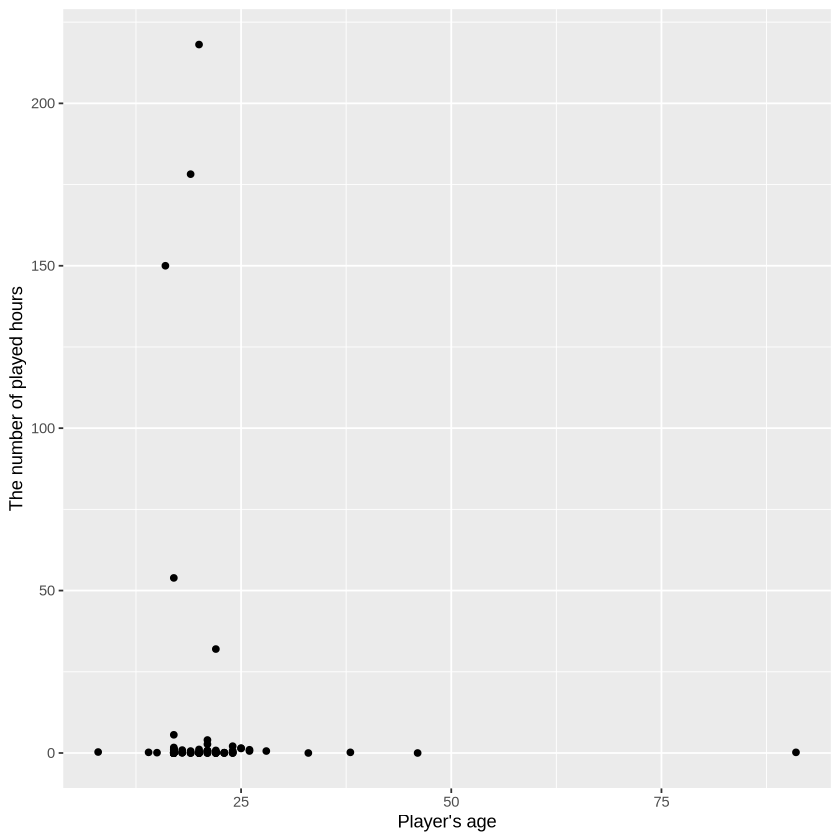

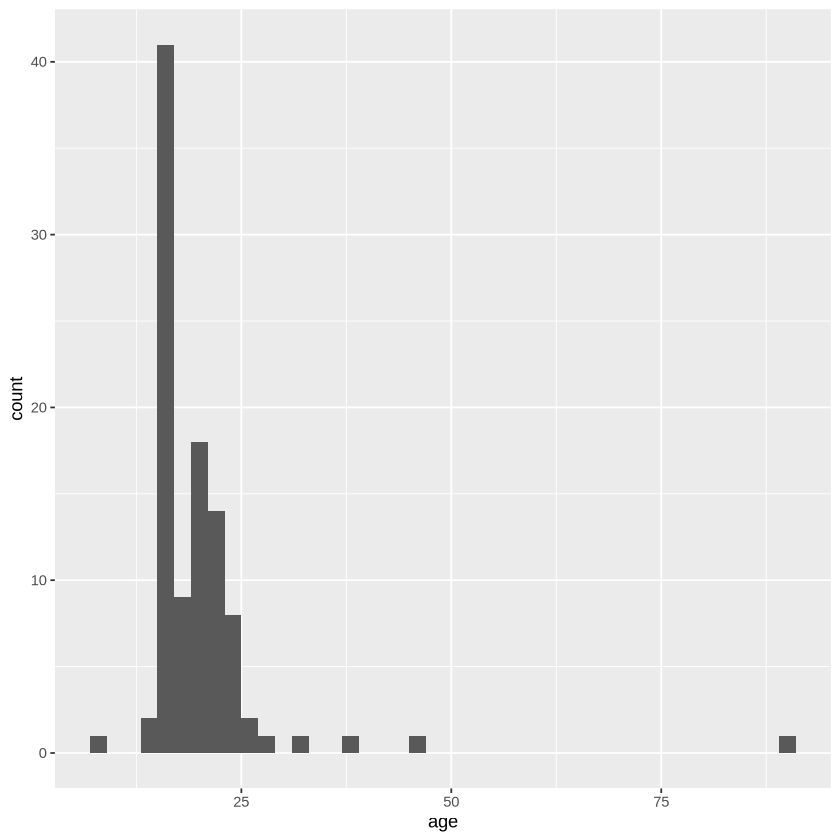

In [58]:
set.seed(123)
players_selected <- players_final |>
    select(age, experience, total_played_hours)

players_100 <- players_selected |>
    sample_n(100)
players_100

sample_plot <- players_100 |>
    ggplot(aes(x=age, y=total_played_hours))+
    geom_point()+
    xlab("Player's age")+
    ylab("The number of played hours")
sample_plot

age_distribution <- players_100 |>
    ggplot(aes(x = age)) +
    geom_histogram(binwidth = 2)
age_distribution
# i am not sure whether we should use binwidth = 3 to see a broader pattern or = 1 to see the precise one
# this cell is mostly for rough visualization prior to actuall regression

In [59]:
set.seed(123)
players_split <- initial_split(players_final, prop = 0.75, strata = total_played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

In [60]:
set.seed(123)
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

players_recipe <- recipe(total_played_hours ~ age, data = players_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())
players_recipe

players_vfold <- vfold_cv(players_training, v = 4, strata = total_played_hours)

players_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec)

players_workflow



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [61]:
set.seed(123)
gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 7))

players_results <- players_workflow |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics() |>

# added filter
    filter(.metric == "rmse")

players_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,34.96602,4,11.368616,Preprocessor1_Model01
8,rmse,standard,29.30318,4,6.751021,Preprocessor1_Model02
15,rmse,standard,28.01080,4,6.244736,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
85,rmse,standard,28.27633,4,6.167207,Preprocessor1_Model13
92,rmse,standard,28.24833,4,6.208501,Preprocessor1_Model14
99,rmse,standard,28.21565,4,6.272592,Preprocessor1_Model15


In [62]:
set.seed(123)

min_rmspe <- players_results |>
    filter(mean == min(mean))
min_rmspe

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
15,rmse,standard,28.0108,4,6.244736,Preprocessor1_Model03


In [63]:
set.seed(123)

k_min <- min_rmspe |>
         pull(neighbors)

best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
         set_mode("regression")

best_fit <- workflow() |>
         add_recipe(players_recipe) |>
         add_model(best_spec) |>
         fit(data = players_training)

players_summary <- best_fit |>
          predict(players_testing) |>
          bind_cols(players_testing) |>
          metrics(truth = total_played_hours, estimate = .pred)
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,22.788240983
rsq,standard,0.008645417
mae,standard,7.092533333


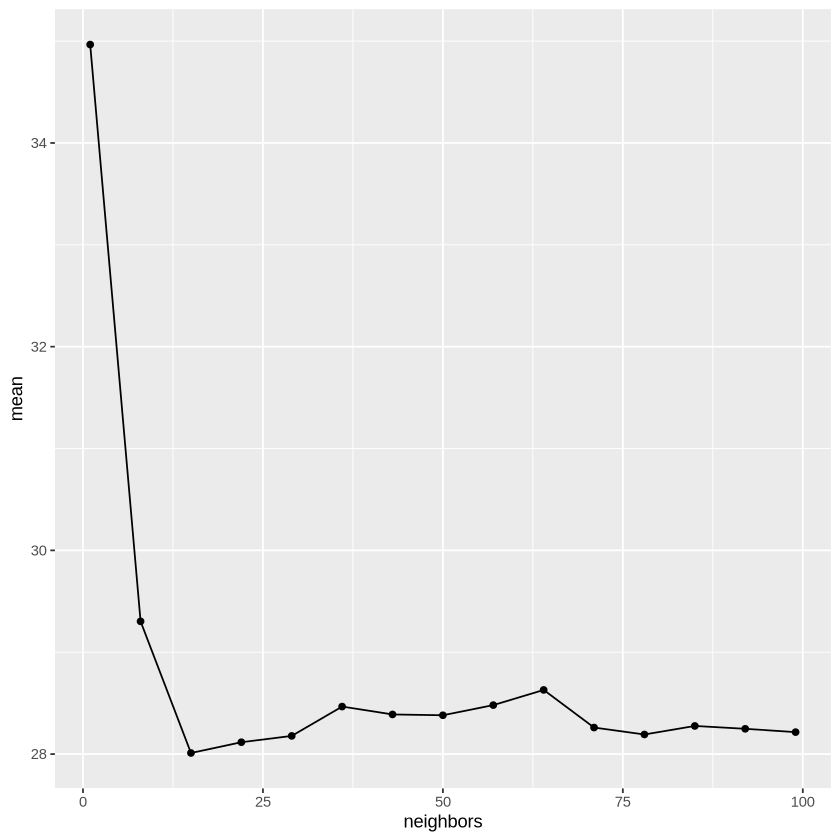

In [64]:
#verifying that lowest is indeed k = 15

test <- players_results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line()

test

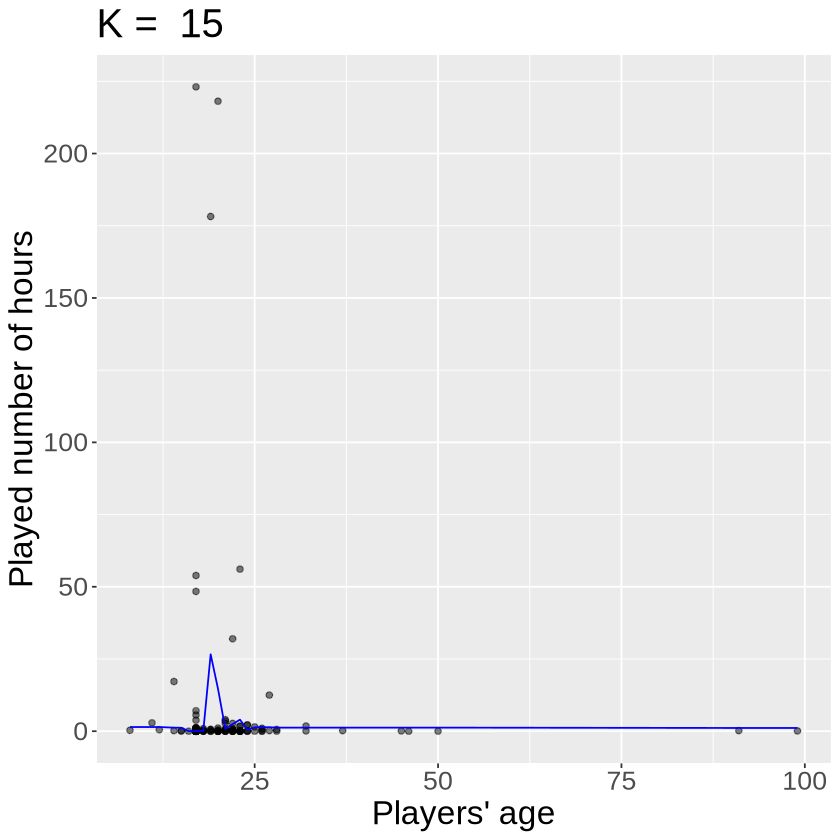

In [75]:
options(repr.plot.width = 7, repr.plot.height = 7)

players_preds <- best_fit|>
    predict(players_training) |>
    bind_cols(players_training)

players_plot <- players_preds |>
    ggplot(aes(x=age, y=total_played_hours))+
    geom_point(alpha = 0.5)+
    geom_line(data = players_preds,
            mapping = aes(x = age, y = .pred),
            color = "blue") +
    xlab("Players' age")+
    ylab("Played number of hours")+
    ggtitle(paste("K = ", k_min)) +
    theme(text = element_text(size = 20))

players_plot

hashedEmail,played_hours,age,experience
<chr>,<dbl>,<dbl>,<chr>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,9,Pro
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,17,Veteran
b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,17,Veteran
⋮,⋮,⋮,⋮
d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,17,Amateur
f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,17,Amateur
d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,91,Pro


hashedEmail,played_hours,age,experience
<chr>,<dbl>,<dbl>,<chr>
f4f29f2465743ead8c3ce02fc84542afe33ae3c95ef56a42b8f7785550fe9e4a,0.6,19,Pro
f7875ae87a61632030d5c4029ee8cf081be7047b2b4a9c04ab5a706f59786197,0.2,17,Pro
3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,22,Amateur
⋮,⋮,⋮,⋮
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1.1,20,Beginner
c871393f513c68e313874ac9d192a0b8be7bf99a96bff0ab46beb343ee4217d5,2.7,22,Veteran
66c0d0e7306c473d4d3107c74dc6887dc73e3fa311f6b382fc2ca6beec75bc0d,0.0,24,Beginner


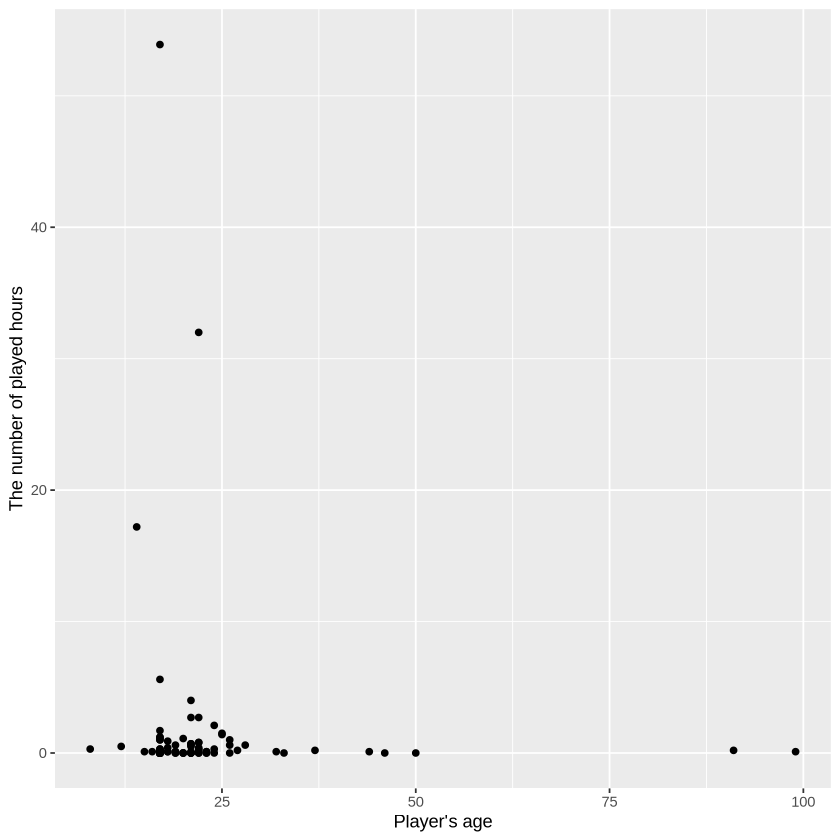

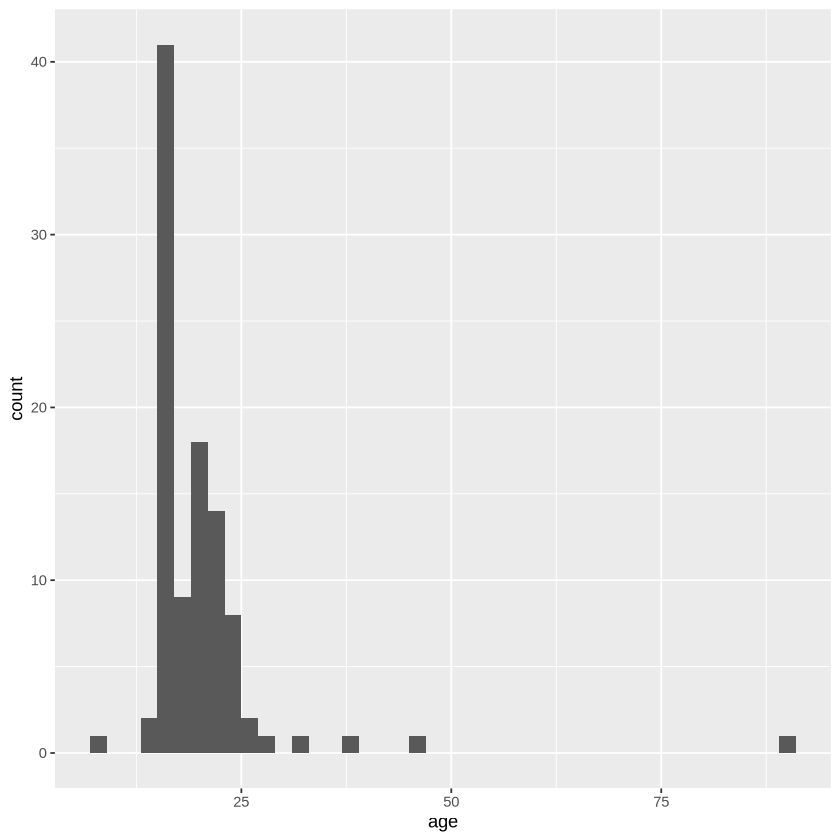

In [66]:
new_df <- filter(players, played_hours < 100)

players_final2 <- select(new_df, hashedEmail, played_hours, age, experience)
players_final2

set.seed(123)

players_100_2 <- players_final2 |>
    sample_n(100)
players_100_2

sample_plot2 <- players_100_2 |>
    ggplot(aes(x=age, y=played_hours))+
    geom_point()+
    xlab("Player's age")+
    ylab("The number of played hours")
sample_plot2

age_distribution2 <- players_100 |>
    ggplot(aes(x = age)) +
    geom_histogram(binwidth = 2)
age_distribution2

In [69]:
set.seed(123)
players_split2 <- initial_split(players_final2, prop = 0.75, strata = played_hours)
players_training2 <- training(players_split2)
players_testing2 <- testing(players_split2)

players_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

players_recipe2 <- recipe(played_hours ~ age, data = players_training2) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())
players_recipe2

players_vfold2 <- vfold_cv(players_training2, v = 4, strata = played_hours)

players_workflow2 <- workflow() |>
    add_recipe(players_recipe2) |>
    add_model(players_spec2)

players_workflow2



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [70]:
set.seed(123)
gridvals2 <- tibble(neighbors = seq(from = 1, to = 100, by = 7))

players_results2 <- players_workflow2 |>
    tune_grid(resamples = players_vfold2, grid = gridvals2) |>
    collect_metrics() |>

# added filter
    filter(.metric == "rmse")

players_results2

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,7.943823,4,2.234109,Preprocessor1_Model01
8,rmse,standard,7.873608,4,2.160930,Preprocessor1_Model02
15,rmse,standard,7.661984,4,2.241500,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
85,rmse,standard,7.453077,4,2.205751,Preprocessor1_Model13
92,rmse,standard,7.432803,4,2.191517,Preprocessor1_Model14
99,rmse,standard,7.479251,4,2.159174,Preprocessor1_Model15


In [72]:
set.seed(123)

min_rmspe2 <- players_results2 |>
    filter(mean == min(mean))
min_rmspe2

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
43,rmse,standard,7.40357,4,2.229201,Preprocessor1_Model07


In [73]:
set.seed(123)

k_min2 <- min_rmspe2 |>
         pull(neighbors)

best_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min2) |>
         set_engine("kknn") |>
         set_mode("regression")

best_fit2 <- workflow() |>
         add_recipe(players_recipe2) |>
         add_model(best_spec2) |>
         fit(data = players_training2)

players_summary2 <- best_fit2 |>
          predict(players_testing2) |>
          bind_cols(players_testing2) |>
          metrics(truth = played_hours, estimate = .pred)
players_summary2

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,5.470342541
rsq,standard,0.004537112
mae,standard,2.488324632


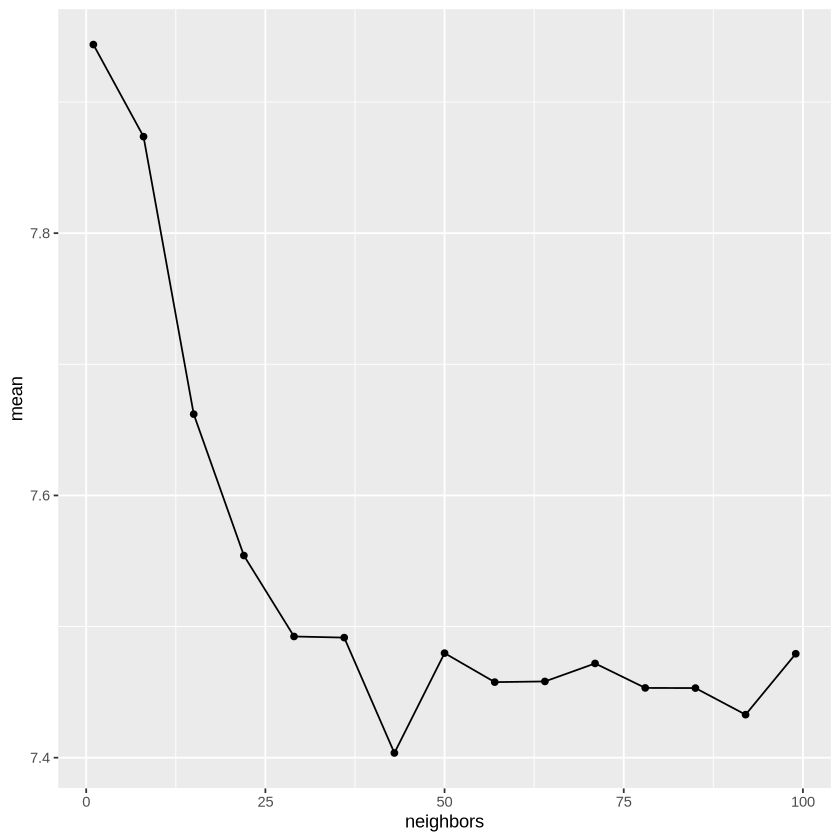

In [78]:
#verifying that lowest is indeed k = 43

test2 <- players_results2 |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line()

test2

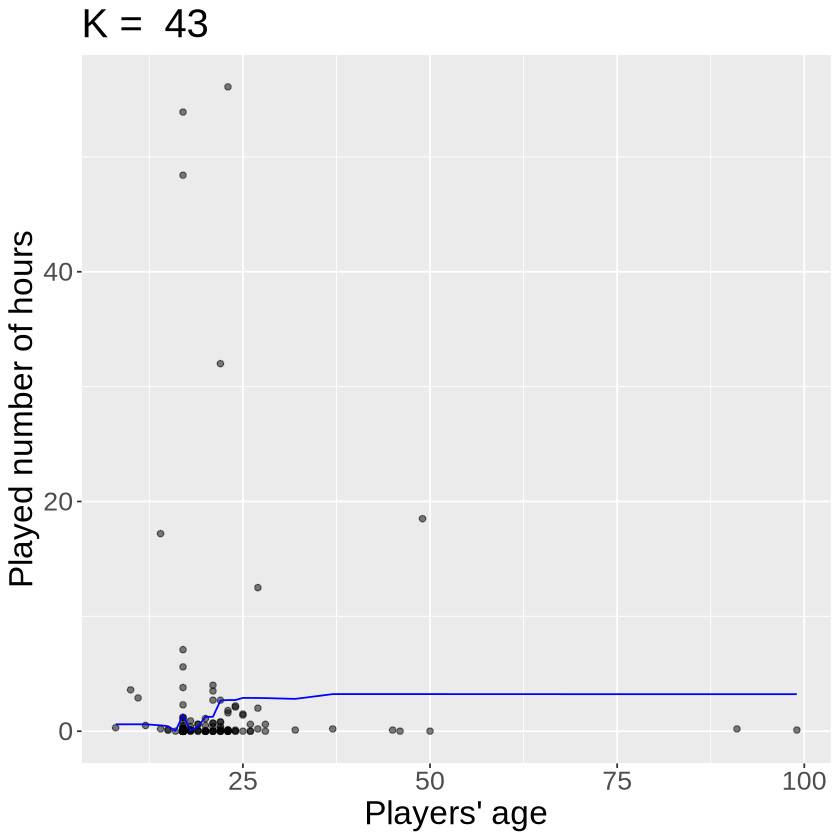

In [76]:
options(repr.plot.width = 7, repr.plot.height = 7)

players_preds2 <- best_fit2|>
    predict(players_training2) |>
    bind_cols(players_training2)

players_plot2 <- players_preds2 |>
    ggplot(aes(x=age, y= played_hours))+
    geom_point(alpha = 0.5)+
    geom_line(data = players_preds2,
            mapping = aes(x = age, y = .pred),
            color = "blue") +
    xlab("Players' age")+
    ylab("Played number of hours")+
    ggtitle(paste("K = ", k_min2)) +
    theme(text = element_text(size = 20))

players_plot2